In [1]:
import os, sys, time
print(sys.executable)

/Users/deepalisharma/opt/anaconda3/bin/python


In [48]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
#pd.set_option('display.max_rows', 10)
import seaborn as sns
sns.set_style("whitegrid")
import numpy as np
import warnings
warnings.filterwarnings("ignore")
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime


In [49]:
df_data = pd.read_csv("Data_train.csv")
df_data.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [50]:
df_labels = pd.read_csv("Data_train_labels.csv")
df_labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [51]:
df = pd.merge(df_data,df_labels,how='inner',left_on='id', right_on='id')
df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [76]:
df.status_group.value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [52]:
df_ana = df.copy()
df_ana=df_ana.drop(columns=['num_private','waterpoint_type_group'],axis=1)

In [53]:
features_numerical=['gps_height', 'region_code', 'district_code',\
                    'population', 'construction_year','amount_tsh',\
                    'longitude', 'latitude']

In [54]:
dic = {'functional':0, 'non functional':1,'functional needs repair':2 }
#dic = {"NO":0, "YES":1}
df_ana.replace({"status_group": dic}, inplace=True)
df_ana["status_group"].value_counts()

0    32259
1    22824
2     4317
Name: status_group, dtype: int64

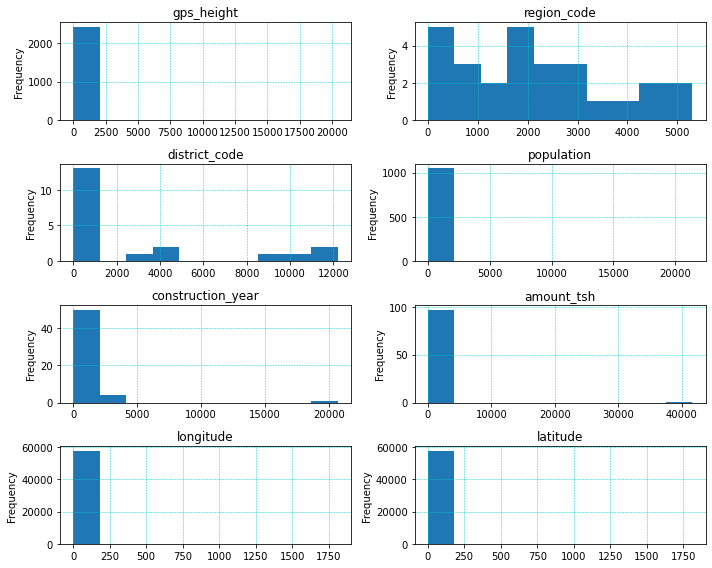

In [22]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10,8))#,constrained_layout=True)

for col, ax in zip(features_numerical, axes.flatten()):
    (df_ana.groupby(col)               # group values together by column of interest
         .count()['status_group']     # take the mean of the saleprice for each group
         .sort_values()              # sort the groups in ascending order
         .plot
         .hist(ax=ax)   )         # create a bar graph on the ax
    
    ax.set_title(col)              # Make the title the name of the column
    ax.grid(True, color = 'DarkTurquoise', alpha=1, linestyle = '--', linewidth = 0.5)
    
fig.tight_layout()

In [55]:
features_categorical=['date_recorded', 'funder', 'installer', 'wpt_name', 'basin',\
                      'subvillage', 'region', 'lga', 'ward', 'public_meeting',\
                      'recorded_by', 'scheme_management', 'permit', 'extraction_type',\
                      'extraction_type_group', 'extraction_type_class', 'management',\
                      'management_group', 'payment', 'payment_type', 'water_quality',\
                      'quality_group', 'quantity', 'quantity_group', 'source',\
                      'source_type', 'source_class', 'waterpoint_type', 'status_group']

In [56]:
df_ana.region.value_counts().count()

21

In [57]:
df_test=pd.DataFrame(df_ana[['region','status_group']].groupby('region').count())

In [58]:
df_ana[['region','status_group']].groupby('status_group').count()

,region
status_group,
0,32259
1,22824
2,4317


In [59]:
df_test=pd.DataFrame(df_ana[['region','status_group']].groupby(['region','status_group']).agg(({'status_group': ['count']})))
df_test

status_group
                                  count
region        status_group             
Arusha        0                    2294
              1                     881
              2                     175
Dar es Salaam 0                     461
              1                     341
...                                 ...
Tabora        1                    1066
              2                      45
Tanga         0                    1436
              1                    1038
              2                      73

[63 rows x 1 columns]

In [60]:
df_test.columns

MultiIndex([('status_group', 'count')],
           )

In [61]:
df_test.columns = ['_'.join(col) for col in df_test.columns.values]
#df_test.columns=['_'.join(col) if type(col) is tuple else col for col in df_test.columns.values]
df_test

status_group_count
region        status_group                    
Arusha        0                           2294
              1                            881
              2                            175
Dar es Salaam 0                            461
              1                            341
...                                        ...
Tabora        1                           1066
              2                             45
Tanga         0                           1436
              1                           1038
              2                             73

[63 rows x 1 columns]

In [62]:
#df_test.droplevel(level=1)
df_test=df_test.reset_index()

In [63]:
df_test

,region,status_group,status_group_count
0,Arusha,0,2294
1,Arusha,1,881
2,Arusha,2,175
3,Dar es Salaam,0,461
4,Dar es Salaam,1,341
...,...,...,...
58,Tabora,1,1066
59,Tabora,2,45
60,Tanga,0,1436
61,Tanga,1,1038


In [64]:
sorteddf2=df_test.sort_values('status_group_count', ascending=False)
sorteddf2

,region,status_group,status_group_count
9,Iringa,0,4141
51,Shinyanga,0,2789
18,Kilimanjaro,0,2640
30,Mbeya,0,2319
0,Arusha,0,2294
...,...,...,...
62,Tanga,2,73
29,Mara,2,60
59,Tabora,2,45
44,Pwani,2,36


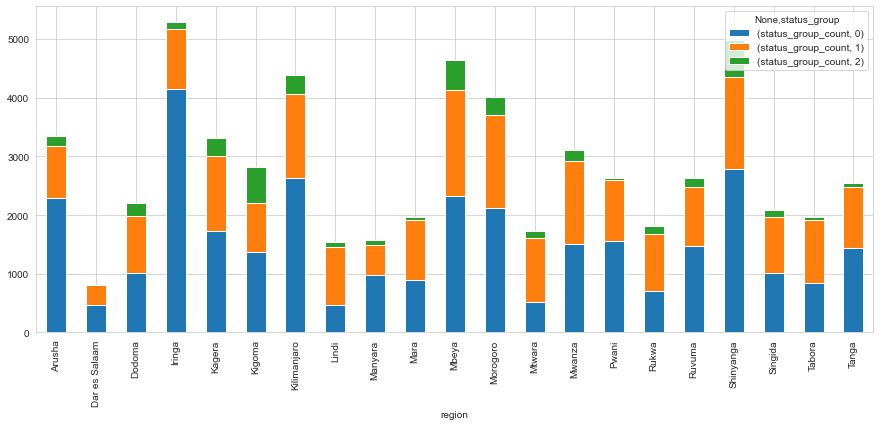

In [65]:
#df_test.groupby(['region','status_group']).sum().unstack()\
#.plot(kind='bar', stacked=True)
#fig, ax=plt.subplots(figsize=(8,6))
ax = df_test.groupby(['region','status_group']).sum().unstack()\
.plot(kind='bar', stacked=True, figsize=(15,6))
#fig, ax=plt.subplots(figsize=(8,6))
#ax.barh(width=sorteddf2.status_group_count,y=sorteddf2.region)

In [315]:
df_play=pd.DataFrame(df[['region','status_group']].groupby(['region','status_group']).agg(({'status_group': ['count']})))
df_play

status_group
                                             count
region        status_group                        
Arusha        functional                      2294
              functional needs repair          175
              non functional                   881
Dar es Salaam functional                       461
              functional needs repair            3
...                                            ...
Tabora        functional needs repair           45
              non functional                  1066
Tanga         functional                      1436
              functional needs repair           73
              non functional                  1038

[63 rows x 1 columns]

In [316]:
df_play=df_play.reset_index()
df_play

region             status_group      
                                           count
0          Arusha               functional  2294
1          Arusha  functional needs repair   175
2          Arusha           non functional   881
3   Dar es Salaam               functional   461
4   Dar es Salaam  functional needs repair     3
..            ...                      ...   ...
58         Tabora  functional needs repair    45
59         Tabora           non functional  1066
60          Tanga               functional  1436
61          Tanga  functional needs repair    73
62          Tanga           non functional  1038

[63 rows x 3 columns]

In [23]:
#!pip install plotnine

In [18]:
#ax = df_play.groupby(['region','count']).sum().unstack()\
#.plot(kind='bar', stacked=True, figsize=(15,6))
from plotnine import *

In [25]:
df_test.status_group_count

0     2294
1      881
2      175
3      461
4      341
      ... 
58    1066
59      45
60    1436
61    1038
62      73
Name: status_group_count, Length: 63, dtype: int64

In [68]:
#sns.barplot(x='region', y='status_group_count', data=df_test, hue='status_group')

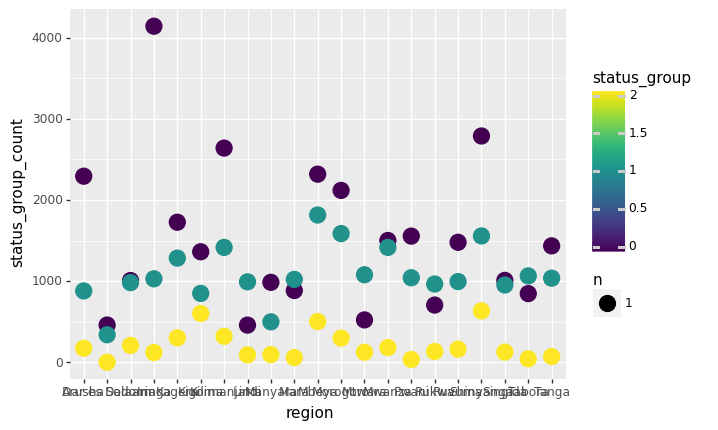

<ggplot: (8769862647522)>

In [67]:
#ggplot(df_test, aes(x='region', fill = 'status_group_count')) + geom_bar(stat = 'count')
ggplot(df_test, aes(x = 'region', y = 'status_group_count', color = 'status_group'))+ geom_count()

In [303]:
#sorteddf2.plot.bar(x='region', stacked=True, title='The number of Students')
#ax = sorteddf2.plot.bar(x='region', stacked=True, color=['tomato','lightseagreen']\
#                        , figsize=(15,6))
#ax.set_title('The Number of Students', fontsize=20)
#ax.set_ylim(0,500)
#ax.set_xticklabels(['A','B','C'], rotation=0)
s1=pd.DataFrame(df_ana[['region','status_group']].groupby(['region','status_group']).agg(({'status_group': ['count']})))
#df_test
s_sort = s1.groupby(level=[0]).sum()#.sort_values(ascending=False)
s2 = s1.reindex(index=s_sort.index, level=0)
#s1=s1.reset_index()
#s_sort = s1.groupby(level=[1]).sum()#.sort_values(ascending=False)
s_sort

,status_group
,count
region,
Arusha,3350
Dar es Salaam,805
Dodoma,2201
Iringa,5294
Kagera,3316
Kigoma,2816
Kilimanjaro,4379
Lindi,1546


<BarContainer object of 63 artists>

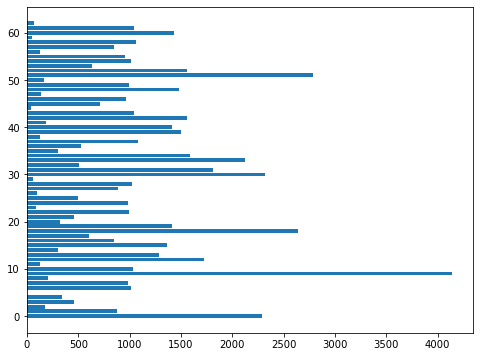

In [241]:
fig, ax=plt.subplots(figsize=(8,6))
ax.barh(width=df_test.status_group_count,y=df_test.index)
#plt.show()

In [188]:
#df_test=pd.DataFrame(df_ana[['region','status_group']].groupby(['region']).count())#agg(({'status_group': ['mean']})))
#df_test

,status_group
region,
Arusha,3350
Dar es Salaam,805
Dodoma,2201
Iringa,5294
Kagera,3316
Kigoma,2816
Kilimanjaro,4379
Lindi,1546
Manyara,1583


In [191]:
df_test.sort_values('status_group',ascending=False)

,status_group
region,
Iringa,5294
Shinyanga,4982
Mbeya,4639
Kilimanjaro,4379
Morogoro,4006
Arusha,3350
Kagera,3316
Mwanza,3102
Kigoma,2816


In [195]:
#df_test = df_test['status_group'].value_counts(ascending=False)#.reset_index()
sortedDF=df_test.sort_values('status_group', ascending=True)
sortedDF

,status_group
region,
Dar es Salaam,805
Lindi,1546
Manyara,1583
Mtwara,1730
Rukwa,1808
Tabora,1959
Mara,1969
Singida,2093
Dodoma,2201


In [75]:
df_test.columns

Index(['region', 'status_group', 'status_group_count'], dtype='object')

<BarContainer object of 21 artists>

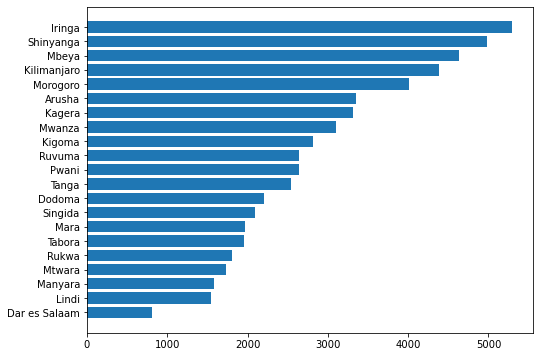

In [201]:
#fig, ax=plt.subplots(figsize=(8,7))
#fig, ax=plt.subplots(figsize=(20,7))
#ax.bar(height=sortedDF.status_group,x=sortedDF.index)
#df_ana['region'].barplot();
#df_test.plot.barh(y='status_group')
fig, ax=plt.subplots(figsize=(8,6))
ax.barh(width=sortedDF.status_group,y=sortedDF.index)
#plt.show()

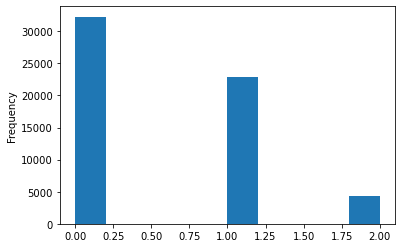

In [202]:
df_ana.status_group.plot.hist()

<AxesSubplot: >

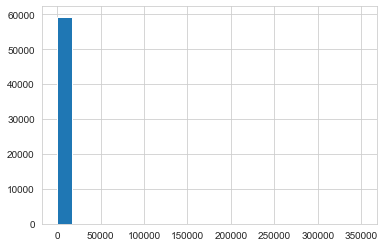

In [72]:
df_ana.amount_tsh.hist(bins=20)

In [78]:
df_ana=df_ana.drop("id",axis=1)

In [80]:
import missingno
missingno.matrix(data, figsize=(20, 12));

NameError: name 'data' is not defined